In this project I will analyze passenger data from the passenger liner RMS Titanic's tragic mayden voyage in April 1912.

I will start by doing some exploratory data analysis with the following initial question in mind:
- **Which factor(s) had the greatest impact on survival rate?**

Laura's question:
1st class women who died vs low class women who died

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from IPython.display import display
from IPython.display import HTML

%matplotlib inline

In [2]:
#loading data

titanic = pd.read_csv('titanic_data.csv')



In [230]:
#Inital exploration

from IPython.display import display

print(titanic.columns)

print("number of passenger records:", len(titanic))

display(titanic.head(5))

display(titanic.iloc[5])

display(titanic[titanic['Age'] == 32])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_male', 'is_female'],
      dtype='object')
number of passenger records: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0


PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
is_male                       1
is_female                     0
Name: 5, dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,1.0,0.0
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1.0,0.0
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,0.0,1.0
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,1.0,0.0
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,0.0,1.0
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,1.0,0.0
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,1.0,0.0
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,1.0,0.0
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,1.0,0.0
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S,1.0,0.0


In [235]:
#Issues with age, will need to look closer into
print(titanic['Age'].describe())

display(titanic[titanic['Age'] == titanic['Age'].min()])

display(titanic['Age'].head(10))

display(titanic[titanic['Age'] == 32])

titanic.groupby('Age')['PassengerId'].agg('count')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,1.0,0.0


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,1.0,0.0
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1.0,0.0
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,0.0,1.0
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,1.0,0.0
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,0.0,1.0
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,1.0,0.0
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,1.0,0.0
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,1.0,0.0
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,1.0,0.0
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S,1.0,0.0


Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: PassengerId, dtype: int64

In [4]:
#Making 'Sex' numeric to be able to perform mathematical operations using the variable
titanic['is_male'] = np.repeat(np.nan,len(titanic))
titanic['is_female'] = np.repeat(np.nan,len(titanic))

titanic['is_male'][titanic['Sex'] == 'male'] = True
titanic['is_male'][titanic['Sex'] == 'female'] = False
titanic['is_female'][titanic['Sex'] == 'female'] = True
titanic['is_female'][titanic['Sex'] == 'male'] = False

display(titanic.head(5))

display(titanic['is_male'].value_counts())
display(titanic['is_female'].value_counts())
display(titanic['Sex'].value_counts())

/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0


1.0    577
0.0    314
Name: is_male, dtype: int64

0.0    577
1.0    314
Name: is_female, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

In [5]:
titanic['is_male'][titanic['Sex'] == 'male'].head(5)

0    1.0
4    1.0
5    1.0
6    1.0
7    1.0
Name: is_male, dtype: float64

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
is_male       -0.543351
is_female      0.543351
Name: Survived, dtype: float64

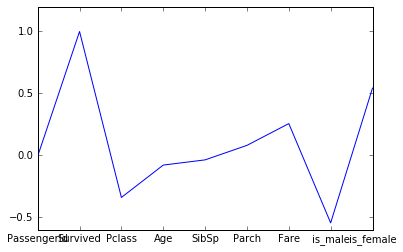

In [6]:
#Looking at survival correlation using the Pandas corr() (Pearson's correlation coefficient) function

survival_correlation = titanic.corr()['Survived']

display(survival_correlation)

survival_correlation.plot()


This indicates that gender (being female) and passenger class where the most important factors for survival on the Titanic, with high and medium correlation scores. Ticket price also has a fairly large correlation score (Pearson's correlation coefficient). I suspect this is due to better ticket classes costing more, which I will test for next.

In [7]:
display(titanic.corr()['Fare'])

display(titanic.groupby('Pclass')['Fare'].describe())


PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.096067
SibSp          0.159651
Parch          0.216225
Fare           1.000000
is_male       -0.182333
is_female      0.182333
Name: Fare, dtype: float64

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

In [8]:
#Looking further at the passengers who did not pay for their tickets (ticket price 0)

zero_fare = (titanic[titanic['Fare'] == 0].sort_values('Pclass'))

display(zero_fare)

zero_fare.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1.0,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1.0,0.0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1.0,0.0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1.0,0.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,1.0,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1.0,0.0
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,1.0,0.0


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_male,is_female
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0,15.0,15.0
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0,1.0,0.0
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0,0.0,0.0
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0,1.0,0.0
25%,290.500000,0.000000,1.000000,NaN,0.0,0.0,0.0,1.0,0.0
50%,482.000000,0.000000,2.000000,NaN,0.0,0.0,0.0,1.0,0.0
75%,704.000000,0.000000,2.500000,NaN,0.0,0.0,0.0,1.0,0.0
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0,1.0,0.0


In [9]:
#Checking for corelation again, excluding passenger who did not pay for their tickets.

display(titanic[titanic['Fare'] > 0].corr()['Fare'])

PassengerId    0.015861
Survived       0.252453
Pclass        -0.561517
Age            0.098981
SibSp          0.155240
Parch          0.212137
Fare           1.000000
is_male       -0.175592
is_female      0.175592
Name: Fare, dtype: float64

Since the correlation between ticket class and ticket price is high, I will only look at ticket class as a social class indicator going forward, and I will not look at ticket price again.

In [10]:
titanic.groupby('Survived').sum()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,is_male,is_female
Survived,,,,,,,,
0,245412,1390,12985.50,304,181,12142.7199,468.0,81.0
1,151974,667,8219.67,162,159,16551.2294,109.0,233.0


def proportions(df):
    
    
    df['proportions'] =  / titanic_count
    

#class_survival_gender['PassengerId'].loc[1,(0,1),'female']


In [11]:

gb_survival_class_sex = titanic.groupby(['Pclass','Sex']).agg({'Survived': 'sum'})


In [12]:
tmp_gb = titanic.groupby(['Pclass','Sex','Survived'])#.agg({'Survived':'count'})
display(tmp_gb)

#tmp_gb.loc[(:),'female']

#dfb = df.groupby('cat').get_group('b')

#class_survival_gender['PassengerId'].loc[(1,2),(0,1),'female']

#(tmp_gb.loc[(1,2,3),('female','male'),0]).div(gb_survival_class_gender, level='Survived')

#state_office.div(state, level='state') * 100

tmp_gb.get_group((1,'female',1))

#tmp_gb.groups

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.0,1.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0.0,1.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0.0,1.0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,0.0,1.0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0.0,1.0
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,0.0,1.0
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,0.0,1.0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,0.0,1.0


In [13]:
#counting survivors by ticket class and gender
gb_survival_class_gender = titanic.groupby(['Pclass','Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})

#calculating percentage of survivors
gb_survival_class_gender['percent_survived'] = (
    round(gb_survival_class_gender['Survived'] / gb_survival_class_gender['Passengers'] * 100,2)
)

#counting survivors by gender
gb_survival_gender = titanic.groupby(['Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})

display(gb_survival_class_gender)
display(gb_survival_gender)

gb_survival_class_gender['Survived'].div(gb_survival_gender['Passengers'],level='Sex')

Survived  Passengers  percent_survived
Pclass Sex                                           
1      female        91          94             96.81
       male          45         122             36.89
2      female        70          76             92.11
       male          17         108             15.74
3      female        72         144             50.00
       male          47         347             13.54

,Survived,Passengers
Sex,,
female,233,314
male,109,577


Pclass  Sex   
1       female    0.289809
        male      0.077990
2       female    0.222930
        male      0.029463
3       female    0.229299
        male      0.081456
dtype: float64

In [62]:
clust_data = []
a_list = []
for i in range(0,10):
    a_list.append(i)
    if len(a_list)>3:
        a_list.remove(a_list[0])
        listoflists.append((list(a_list), a_list[0]))
display(listoflists)

[([1, 2, 3], 1),
 ([2, 3, 4], 2),
 ([3, 4, 5], 3),
 ([4, 5, 6], 4),
 ([5, 6, 7], 5),
 ([6, 7, 8], 6),
 ([7, 8, 9], 7),
 ([1, 2, 3], 1),
 ([2, 3, 4], 2),
 ([3, 4, 5], 3),
 ([4, 5, 6], 4),
 ([5, 6, 7], 5),
 ([6, 7, 8], 6),
 ([7, 8, 9], 7),
 ([1, 2, 3], 1),
 ([2, 3, 4], 2),
 ([3, 4, 5], 3),
 ([4, 5, 6], 4),
 ([5, 6, 7], 5),
 ([6, 7, 8], 6),
 ([7, 8, 9], 7),
 ([1, 2, 3], 1),
 ([2, 3, 4], 2),
 ([3, 4, 5], 3),
 ([4, 5, 6], 4),
 ([5, 6, 7], 5),
 ([6, 7, 8], 6),
 ([7, 8, 9], 7)]

In [88]:
gb_survival_class_gender[['Survived','Passengers']].to_records()

rec.array([(1, 'female', 91, 94), (1, 'male', 45, 122), (2, 'female', 70, 76),
 (2, 'male', 17, 108), (3, 'female', 72, 144), (3, 'male', 47, 347)], 
          dtype=[('Pclass', '<i8'), ('Sex', '<U6'), ('Survived', '<i8'), ('Passengers', '<i8')])

In [161]:
type(gb_survival_class_gender[['Survived','Passengers']])

pandas.core.frame.DataFrame

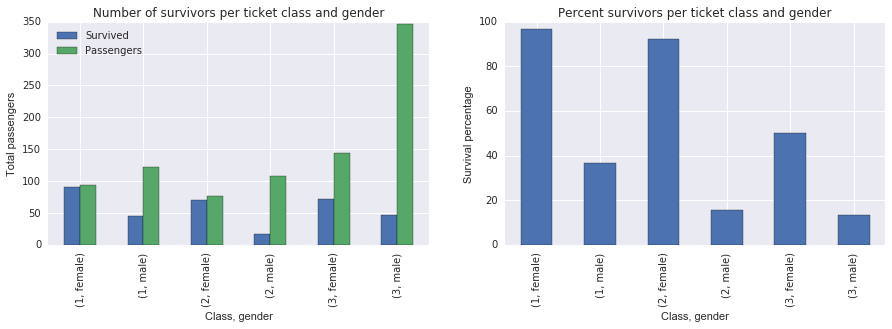

In [225]:
# col_labels = gb_survival_class_gender.index.levels[1]
# row_labels = gb_survival_class_gender.index.levels[0]
# table_vals = list()

# for row in row_labels:
#     for col in col_labels:
#         table_vals.append(gb_survival_class_gender.loc[row,col]['percent_survived'])

#plt.subplot(1,2,1)        
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,4))

plt.title("Number of survivors per ticket class and gender")

gbplot1 = gb_survival_class_gender[['Survived','Passengers']].plot(kind='bar',ax=axes[0])

#gbplot.set_xticklabels(['females 1st class','males 1st class', 'females 2nd class',
#                       'males 2nd class','females 3rd class', 'males 3rd class'])

gbplot1.set_xlabel("Class, gender")
gbplot1.set_ylabel("Total passengers")
gbplot1.set_title("Number of survivors per ticket class and gender")

#plt.subplot(2,1,2)


#collabel=("col 1", "col 2","col 3")
#the_table = gbplot.table(cellText=gb_survival_class_gender[['percent_survived']].to_records(),colLabels=collabel,loc='center')
#----------
# plt.subplot(2,1,2)
# fig, axs =plt.subplots(2,1)
# clust_data = np.random.random((10,3))
# collabel=("col 1", "col 2", "col 3")
# axs[0].axis('tight')
# axs[0].axis('off')
# the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')

# axs[1].plot(clust_data[:,0],clust_data[:,1])

#----------

gbplot2 = gb_survival_class_gender['percent_survived'].plot(kind='bar',ax=axes[1])

gbplot2.set_xlabel("Class, gender")
gbplot2.set_ylabel("Survival percentage")
gbplot2.set_title("Percent survivors per ticket class and gender")

plt.show()

#plt.subplot(1,2,2)

#plt.close()

#gb_survival_class_gender.reset_index(level=1)


The plots above highlights how much class determined likelihood of survival on the Titanic. We see that the large majority of females in 2nd and 1st class survived, only half of the females in 3rd class survived. It's interesting to observe that this group of passengers still had a higher survival rate than any of the male groups, where the highest survival rate were the first class passengers. Only 50% of male first class passengers survived.

In [140]:
survival_by_gender = titanic.groupby('Sex')['Survived'].agg(['sum','count'])

survival_by_gender['percent_survivors'] = round((survival_by_gender['sum'] / survival_by_gender['count']) * 100,2)



HTML("<b>Plot to highlight gender ")
survival_by_gender.plot

,sum,count,percent_survivors
Sex,,,
female,233,314,74.20
male,109,577,18.89


In [17]:
#Looking at effect of ticket class

class_survival_gender = titanic.groupby(['Pclass','Survived','Sex'])['PassengerId'].agg('count')
print("Count when grouped by class, survival, and gender.")
display(class_survival_gender.to_frame())

class_survival = titanic.groupby(['Pclass','Survived']).count()

survival_gender = display(titanic.groupby(['Survived','Sex']).count())
print("Count when grouped by survival and gender")
display(survival_gender)

print("Mean, grouped by class")
display(titanic.groupby('Pclass').mean())

print("Survival percentage per gender.")
survival_percentage_per_gender = titanic.groupby(['Sex'])['Survived'].mean() * 100
display(survival_percentage_per_gender.to_frame())



Count when grouped by class, survival, and gender.


PassengerId
Pclass Survived Sex                
1      0        female            3
                male             77
       1        female           91
                male             45
2      0        female            6
                male             91
       1        female           70
                male             17
3      0        female           72
                male            300
       1        female           72
                male             47

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  is_male  is_female  
Survived Sex                                          
0        female      6        81       81         81  
         male       62       468      468        468  
1        female     91       231      233        233  
         male       45       109      109        109

Count when grouped by survival and gender


None

Mean, grouped by class


,PassengerId,Survived,Age,SibSp,Parch,Fare,is_male,is_female
Pclass,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.564815,0.435185
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.586957,0.413043
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.706721,0.293279


Survival percentage per gender.


,Survived
Sex,
female,74.203822
male,18.890815


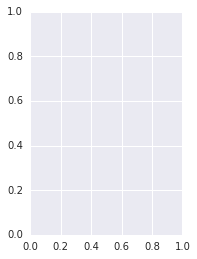

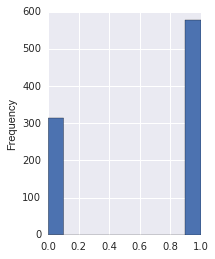

In [169]:
plt.figure(1)
plt.subplot(1,2,1)

titanic.groupby(['Survived','Sex'])[['is_female','is_male']].agg('mean').plot(kind='bar')

plt.subplot(1,2,2)

titanic['is_male'].plot(kind='hist')

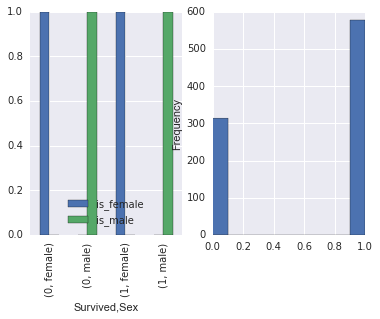

In [195]:
fig,axes=plt.subplots(nrows=1,ncols=2)

titanic.groupby(['Survived','Sex'])[['is_female','is_male']].agg('mean').plot(kind='bar',ax=axes[0])

titanic['is_male'].plot(kind='hist',ax=axes[1])

In [187]:
df1[['x column','y column']].agg('mean')

,,x column,y column
a,b,,
0.049526,0.341569,0.844387,0.302773
0.179796,0.026868,0.881714,0.746915
0.514892,0.379565,0.762135,0.518358
0.631202,0.500738,0.655239,0.627741
0.705321,0.756767,0.479151,0.933658
0.727755,0.381025,0.742886,0.844945
0.808502,0.658472,0.597946,0.129532
0.885599,0.964423,0.044530,0.790219
0.937760,0.227248,0.471601,0.148542


a         b       
0.058151  0.711037    Axes(0.547727,0.125;0.352273x0.352273)
0.097658  0.068899    Axes(0.547727,0.125;0.352273x0.352273)
0.201418  0.002238    Axes(0.547727,0.125;0.352273x0.352273)
0.235042  0.154461    Axes(0.547727,0.125;0.352273x0.352273)
0.395260  0.460012    Axes(0.547727,0.125;0.352273x0.352273)
0.589402  0.110088    Axes(0.547727,0.125;0.352273x0.352273)
0.780704  0.436997    Axes(0.547727,0.125;0.352273x0.352273)
0.784580  0.975573    Axes(0.547727,0.125;0.352273x0.352273)
0.797764  0.389499    Axes(0.547727,0.125;0.352273x0.352273)
0.876827  0.074219    Axes(0.547727,0.125;0.352273x0.352273)
dtype: object

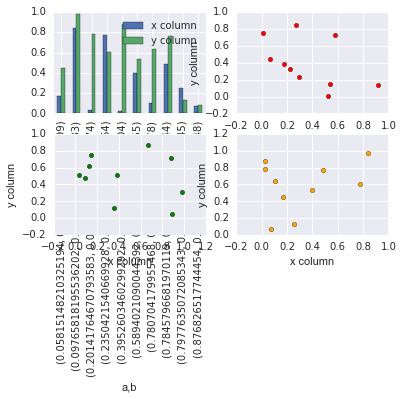

In [188]:
from numpy.random import rand

df1=pd.DataFrame(rand(10,4),columns=['x column','y column','a','b']).groupby(['a','b'])
df2=pd.DataFrame(rand(10,4),columns=['x column','y column','a','b'])
df3=pd.DataFrame(rand(10,4),columns=['x column','y column','a','b'])
df4=pd.DataFrame(rand(10,4),columns=['x column','y column','a','b'])

fig,axes=plt.subplots(nrows=2,ncols=2)
#df1[['x column','y column']].plot(kind='column',x='x column',y='y column',ax=axes[0,0])
df1[['x column','y column']].agg('mean').plot(kind='bar',ax=axes[0,0])
df2.plot(kind='scatter',x='x column',y='y column',ax=axes[0,1],color='red')
df3.plot(kind='scatter',x='x column',y='y column',ax=axes[1,0],color='green')
df1.plot(kind='scatter',x='x column',y='y column',ax=axes[1,1],color='orange')

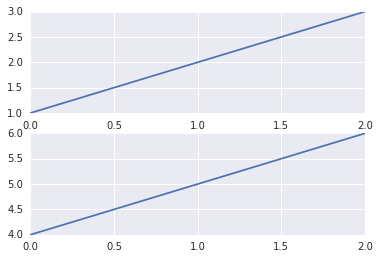

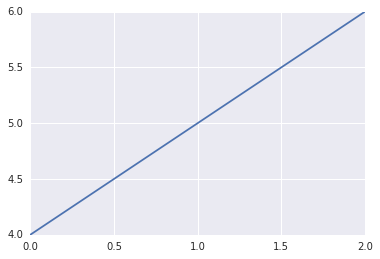

In [168]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

#plt.figure(1)                # figure 1 current; subplot(212) still current
#plt.subplot(211)             # make subplot(211) in figure1 current
#plt.title('Easy as 1, 2, 3') # subplot 211 title

In [156]:
titanic.groupby('Survived')['is_female'].agg('mean').plot

Survived
0    0.147541
1    0.681287
Name: is_female, dtype: float64

In [19]:
display(titanic.groupby(['Sex'])['Survived'].mean().to_frame())


,Survived
Sex,
female,0.742038
male,0.188908


__To do next:__

1. <s>Finish the plot of survival and gender. See http://stackoverflow.com/questions/8524401/how-can-i-place-a-table-on-a-plot-in-matplotlib</s>
2. Clean up: go through and see what's worth keeping, and remove the rest 
    2a. Sort out data issues. Age at least.
3. Upload HTML and get feedback from Elvee
4. Look at Evernote note for further steps